In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import shapefile as shp
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##1 Creating UK Map

In [2]:
import geopandas as gpd
import pandas as pd
import json

# Create geodataframe
gdf_map = gpd.read_file(
    'C:/Users/Hafidz/2020PeopleFlux/UK_LA_Districts4.json'
)

#Set the CRS
gdf_map.crs = {'init': 'epsg:27700'}

#Check the CRS
gdf_map.crs

{'init': 'epsg:27700'}

In [3]:
gdf_map.head()

,objectid,lad19cd,lad19nm,lad19nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,,447160,531474,-1.270,54.676,93712619.818,71011.934,"POLYGON ((448986.020 536729.680, 448793.101 53..."
1,2,E06000002,Middlesbrough,,451141,516887,-1.211,54.545,53881564.271,44481.691,"MULTIPOLYGON (((451747.397 520561.100, 451664...."
2,3,E06000003,Redcar and Cleveland,,464361,519597,-1.006,54.568,245069508.917,96703.990,"POLYGON ((478074.077 518800.567, 478164.520 51..."
3,4,E06000004,Stockton-on-Tees,,444940,518183,-1.307,54.557,204932953.781,123408.986,"POLYGON ((448476.677 525831.960, 448365.998 52..."
4,5,E06000005,Darlington,,428029,515648,-1.568,54.535,197475688.992,107206.402,"POLYGON ((436388.002 522354.197, 436304.999 52..."


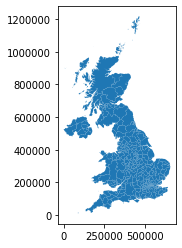

In [4]:
# Plot the map
gdf_map.plot()

In [27]:
gdf_map['lad19nm']

0                               Hartlepool
1                            Middlesbrough
2                     Redcar and Cleveland
3                         Stockton-on-Tees
4                               Darlington
5                                   Halton
6                               Warrington
7                    Blackburn with Darwen
8                                Blackpool
9              Kingston upon Hull, City of
10                East Riding of Yorkshire
11                 North East Lincolnshire
12                      North Lincolnshire
13                                    York
14                                   Derby
15                               Leicester
16                                 Rutland
17                              Nottingham
18                Herefordshire, County of
19                      Telford and Wrekin
20                          Stoke-on-Trent
21            Bath and North East Somerset
22                        Bristol, City of
23         

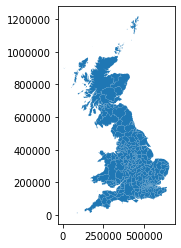

In [5]:
#Removing NI from the map, the column name lad19cd is unique for each started with E,S,NI,W
gdf_map = gdf_map[
    ~gdf_map['lad19cd'].str.startswith('N')
]

gdf_map.plot()

In [26]:
#gdf_map after NI removal
gdf_map['lad19nm']

0                               Hartlepool
1                            Middlesbrough
2                     Redcar and Cleveland
3                         Stockton-on-Tees
4                               Darlington
5                                   Halton
6                               Warrington
7                    Blackburn with Darwen
8                                Blackpool
9              Kingston upon Hull, City of
10                East Riding of Yorkshire
11                 North East Lincolnshire
12                      North Lincolnshire
13                                    York
14                                   Derby
15                               Leicester
16                                 Rutland
17                              Nottingham
18                Herefordshire, County of
19                      Telford and Wrekin
20                          Stoke-on-Trent
21            Bath and North East Somerset
22                        Bristol, City of
23         

In [6]:
# Convert the CRS of gdf_map
gdf_map = gdf_map.to_crs(epsg='4326')

# Check the CRS
gdf_map.crs

{'init': 'epsg:4326', 'no_defs': True}

gdf_map.plot()

##2 Cleaning Dataset

In [8]:
import csv
import pandas as pd
peopleflux = pd.read_csv("C:/Users/Hafidz/2020PeopleFlux/RF03EW.csv")

In [10]:
peopleflux.head()

,placeofwork,ladcd19,Hartlepool,Middlesbrough,Redcar and Cleveland,Stockton-on-Tees,Darlington,County Durham,Northumberland,Gateshead,Newcastle upon Tyne,North Tyneside,South Tyneside,Sunderland,Halton,Warrington,Blackburn with Darwen,Blackpool,Cheshire East,Cheshire West and Chester,Allerdale,Barrow-in-Furness,Carlisle,Copeland,Eden,South Lakeland,Burnley,Chorley,Fylde,Hyndburn,Lancaster,Pendle,Preston,Ribble Valley,Rossendale,South Ribble,West Lancashire,Wyre,Bolton,Bury,Manchester,Oldham,Rochdale,Salford,Stockport,Tameside,Trafford,Wigan,Knowsley,Liverpool,St. Helens,Sefton,Wirral,"Kingston upon Hull, City of",East Riding of Yorkshire,North East Lincolnshire,North Lincolnshire,York,Craven,Hambleton,Harrogate,Richmondshire,Ryedale,Scarborough,Selby,Barnsley,Doncaster,Rotherham,Sheffield,Bradford,Calderdale,Kirklees,Leeds,Wakefield,Derby,Leicester,Rutland,Nottingham,Amber Valley,Bolsover,Chesterfield,Derbyshire Dales,Erewash,High Peak,North East Derbyshire,South Derbyshire,Blaby,Charnwood,Harborough,Hinckley and Bosworth,Melton,North West Leicestershire,Oadby and Wigston,Boston,East Lindsey,Lincoln,North Kesteven,South Holland,South Kesteven,West Lindsey,Corby,Daventry,East Northamptonshire,Kettering,Northampton,South Northamptonshire,Wellingborough,Ashfield,Bassetlaw,Broxtowe,Gedling,Mansfield,Newark and Sherwood,Rushcliffe,"Herefordshire, County of",Telford and Wrekin,Stoke-on-Trent,Shropshire,Cannock Chase,East Staffordshire,Lichfield,Newcastle-under-Lyme,South Staffordshire,Stafford,Staffordshire Moorlands,Tamworth,North Warwickshire,Nuneaton and Bedworth,Rugby,Stratford-on-Avon,Warwick,Bromsgrove,Malvern Hills,Redditch,Worcester,Wychavon,Wyre Forest,Birmingham,Coventry,Dudley,Sandwell,Solihull,Walsall,Wolverhampton,Peterborough,Luton,Southend-on-Sea,Thurrock,Bedford,Central Bedfordshire,Cambridge,East Cambridgeshire,Fenland,Huntingdonshire,South Cambridgeshire,Basildon,Braintree,Brentwood,Castle Point,Chelmsford,Colchester,Epping Forest,Harlow,Maldon,Rochford,Tendring,Uttlesford,Broxbourne,Dacorum,East Hertfordshire,Hertsmere,North Hertfordshire,St Albans,Stevenage,Three Rivers,Watford,Welwyn Hatfield,Breckland,Broadland,Great Yarmouth,King's Lynn and West Norfolk,North Norfolk,Norwich,South Norfolk,Babergh,Forest Heath,Ipswich,Mid Suffolk,St Edmundsbury,Suffolk Coastal,Waveney,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,"Westminster,City of London",Medway,Bracknell Forest,West Berkshire,Reading,Slough,Windsor and Maidenhead,Wokingham,Milton Keynes,Brighton and Hove,Portsmouth,Southampton,Isle of Wight,Aylesbury Vale,Chiltern,South Bucks,Wycombe,Eastbourne,Hastings,Lewes,Rother,Wealden,Basingstoke and Deane,East Hampshire,Eastleigh,Fareham,Gosport,Hart,Havant,New Forest,Rushmoor,Test Valley,Winchester,Ashford,Canterbury,Dartford,Dover,Gravesham,Maidstone,Sevenoaks,Shepway,Swale,Thanet,Tonbridge and Malling,Tunbridge Wells,Cherwell,Oxford,South Oxfordshire,Vale of White Horse,West Oxfordshire,Elmbridge,Epsom and Ewell,Guildford,Mole Valley,Reigate and Banstead,Runnymede,Spelthorne,Surrey Heath,Tandridge,Waverley,Woking,Adur,Arun,Chichester,Crawley,Horsham,Mid Sussex,Worthing,Bath and North East Somerset,"Bristol, City of","Cornwall,Isles of Scilly",Wiltshire,North Somerset,South Gloucestershire,Plymouth,Torbay,Bournemouth,Poole,Swindon,East Devon,Exeter,Mid Devon,North Devon,South Hams,Teignbridge,Torridge,West Devon,Christchurch,East Dorset,North Dorset,Purbeck,West Dorset,Weymouth and Portland,Cheltenham,Cotswold,Forest of Dean,Gloucester,Stroud,Tewkesbury,Mendip,Sedgemoor,South Somerset,Taunton Deane,West Somerset,Isle of Anglesey,Gwynedd,Conwy,Denbighshire,Flintshire,Wrexham,Ceredigion,Pembrokeshire,Carmarthenshire,Swansea,Neath 

In [12]:
#Removing NI from the NOMIS data
peopleflux.shape

(404, 348)

In [13]:
gdf_map.shape

(371, 11)

In [29]:
peopleflux['placeofwork']

0                        Hartlepool
1                     Middlesbrough
2              Redcar and Cleveland
3                  Stockton-on-Tees
4                        Darlington
5                     County Durham
6                    Northumberland
7                         Gateshead
8               Newcastle upon Tyne
9                    North Tyneside
10                   South Tyneside
11                       Sunderland
12                           Halton
13                       Warrington
14            Blackburn with Darwen
15                        Blackpool
16                    Cheshire East
17        Cheshire West and Chester
18                        Allerdale
19                Barrow-in-Furness
20                         Carlisle
21                         Copeland
22                             Eden
23                   South Lakeland
24                          Burnley
25                          Chorley
26                            Fylde
27                         H

In [49]:
peopleflux.shape

(378, 348)

In [50]:
peopleflux['ladcd19']

0      E41000001
1      E41000002
2      E41000003
3      E41000004
4      E41000005
5      E41000047
6      E41000048
7      E41000276
8      E41000277
9      E41000278
10     E41000279
11     E41000280
12     E41000006
13     E41000007
14     E41000008
15     E41000009
16     E41000049
17     E41000050
18     E41000065
19     E41000066
20     E41000067
21     E41000068
22     E41000069
23     E41000070
24     E41000149
25     E41000150
26     E41000151
27     E41000152
28     E41000153
29     E41000154
30     E41000155
31     E41000156
32     E41000157
33     E41000158
34     E41000159
35     E41000160
36     E41000257
37     E41000258
38     E41000259
39     E41000260
40     E41000261
41     E41000262
42     E41000263
43     E41000264
44     E41000265
45     E41000266
46     E41000267
47     E41000268
48     E41000269
49     E41000270
50     E41000271
51     E41000010
52     E41000011
53     E41000012
54     E41000013
55     E41000014
56     E41000189
57     E41000190
58     E410001

In [34]:
#Removing NI from the peopleflux data (NOMIS data), the column name placeofwork is unique for each started with E,S,W (for England, Scotland, Wales) and 9 for Northern Ireland
peopleflux = peopleflux[
    ~peopleflux['ladcd19'].str.startswith('9')
]

In [55]:
gdf_map['lad19nm']

0                               Hartlepool
1                            Middlesbrough
2                     Redcar and Cleveland
3                         Stockton-on-Tees
4                               Darlington
5                                   Halton
6                               Warrington
7                    Blackburn with Darwen
8                                Blackpool
9              Kingston upon Hull, City of
10                East Riding of Yorkshire
11                 North East Lincolnshire
12                      North Lincolnshire
13                                    York
14                                   Derby
15                               Leicester
16                                 Rutland
17                              Nottingham
18                Herefordshire, County of
19                      Telford and Wrekin
20                          Stoke-on-Trent
21            Bath and North East Somerset
22                        Bristol, City of
23         